# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Семинар 7. Big Data Analysis


В рамках сегодняшнего семинара мы не будем проходить какие-то новые темы или разбирать какой-то специфический материал. Вместо этого мы попробуем сосредоточить наши силы на том, чтобы выполнить довольно объёмный проект на действительно серьёзном датасете, частично отражающем в себе концепцию больших данных.

## Постановка задачи исследования

### Предметная область

Мы с вами сегодня проводим исследование лучших заведений по данным Yelp.

Yelp (yelp.com) — это американская платформа, веб-сайт, созданная для поиска заведений на местном рынке услуг, например ресторанов, парикмахерских или любых других, с возможностью добавлять и просматривать рейтинги и обзоры на эти услуги. Для популярных бизнесов на платформе имеются сотни обзоров. Для обозревателей на сайте предусмотрены также некоторые элементы социальной сети.

Другими словами, Yelp является своего рода аналогом наших российских Яндекс карт.

### Данные

В рамках нашего исследования мы будем работать с двумя файлами: `yelp_business.csv` и `yelp_review.csv`.

Файл `yelp_business.csv`, содержащий информацию о компаниях на Yelp:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.


#### Вопрос

Какая из таблиц является главной (а какая сопутствующей)? Почему?

Какой признак является целевой переменной в рамках представленных данных? Почему?

### Задача исследования



Итак, сформулируем первичные задачи исследования, которые нас интересуют на начальном этапе. Каждая из задач исследования соответствует своей части ноутбука ниже:

* Найти город с наибольшим количеством компаний. Схематично визуализировать этот город в ноутбуке.
* Для найденного города определить районы с наиболее качественными услугами.
* Найти рестораны с наилучшими отзывами для этого города.

А также:

* Придумать свою значимую, полезную задачу на имеющихся данных и решить её.

Ну что же! Поехали выполнять поставленные задачи!

## Часть 1. Город с наибольшим количеством компаний



In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Загрузим данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрим на первые несколько строк с помощью метода `head`.

Ссылка на данные: https://drive.google.com/file/d/1WNC1VO4z0ierUCbrnm9Y9fYG7h3xcafk/view?usp=sharing

In [2]:
yelp_business = pd.read_csv('yelp_business.csv', index_col=0)

In [3]:
yelp_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Интересно, какой размер у наших данных: сколько всего присутствует различных компаний в базе? Посмотрим!

In [4]:
yelp_business.shape

(174567, 11)

Итак, мы видим, что уже даже здесь размер таблицы очень внушительный, а ведь это лишь уникальные записи по каждому бизнесу. Вспомним, что мы ещё даже не притрагивались к таблице `yelp_review`, содержащей отзывы по каждой из компаний (которых явно в данных присутствует больше одного и, пожалуй, даже больше 10 на одну компанию)

Такие размышления очень помогают примерно оценить масштаб проекта!

Но вернемся к нашей задаче. Давайте по таблице `yelp_business` найдем пять городов, по которым присутствует информация о наибольшем количестве компаний. Для этого стоит воспользоваться знакомыми нам методами `groupby`, `count`, `sort_values`, `head`. (Использовать при этом команду  `value_counts` не разрешается).

### Задание для самостоятельного решения (часто встречающиеся города)

Реализуйте нахождение пяти наиболее часто встречающихся городов. Формат вывода ниже может помочь вам.

In [ ]:
# your code here

,name
city,
Las Vegas,26775
Phoenix,17213
Toronto,17206
Charlotte,8553
Scottsdale,8228


Ниже представлено решение:

In [6]:
yelp_business.groupby('city').count()['name'].sort_values(ascending=False).head()

,name
city,
Las Vegas,26775
Phoenix,17213
Toronto,17206
Charlotte,8553
Scottsdale,8228


Итак, мы можем видеть, что Лас-Вегас — это тот самый город с наибольшим количеством компаний в рамках нашего исследования. Таким образом, частично первая поставленная задача уже выполнена. Продолжим работу!



Оставим в таблице только записи, соответствующие найденному городу. Нанесем все эти компании на график, в котором по оси $x$ отметим долготу, а по оси $y$ — широту.

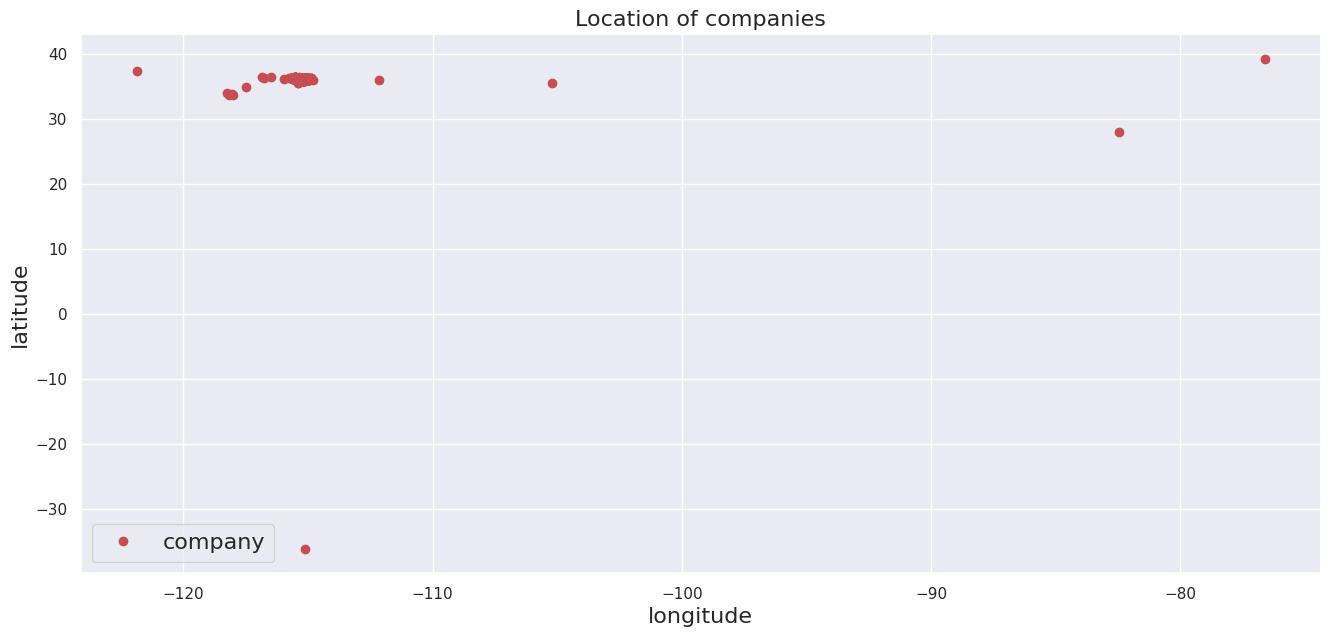

In [7]:
data_lv = yelp_business[yelp_business['city']=='Las Vegas']
plt.figure(figsize=(16, 7))
plt.plot(data_lv['longitude'], data_lv['latitude'], 'ro', label='company')
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('Location of companies', fontsize=16)
plt.legend(fontsize=16, frameon=True)
plt.show()

#### Вопрос

В чем проблема полученного графика? Почему он выглядит именно так?

#### Пояснение

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него, например, в пригороде. Некоторые компании и вовсе зарегестрированы в Лас-Вегасе, но по факту располагаются в другом полушарии.

Ну и как же решить эту проблему?

Избавимся от всех таких компаний, подобрав на основе открытых данных некоторые границы значений широты и долготы для города. Изобразим все компании на новом графике.

In [ ]:
map_data =  data_lv[(data_lv['latitude'] > 35.98) & (data_lv['latitude'] < 36.3) & (data_lv['longitude'] > -115.4) & (data_lv['longitude'] < -115)]

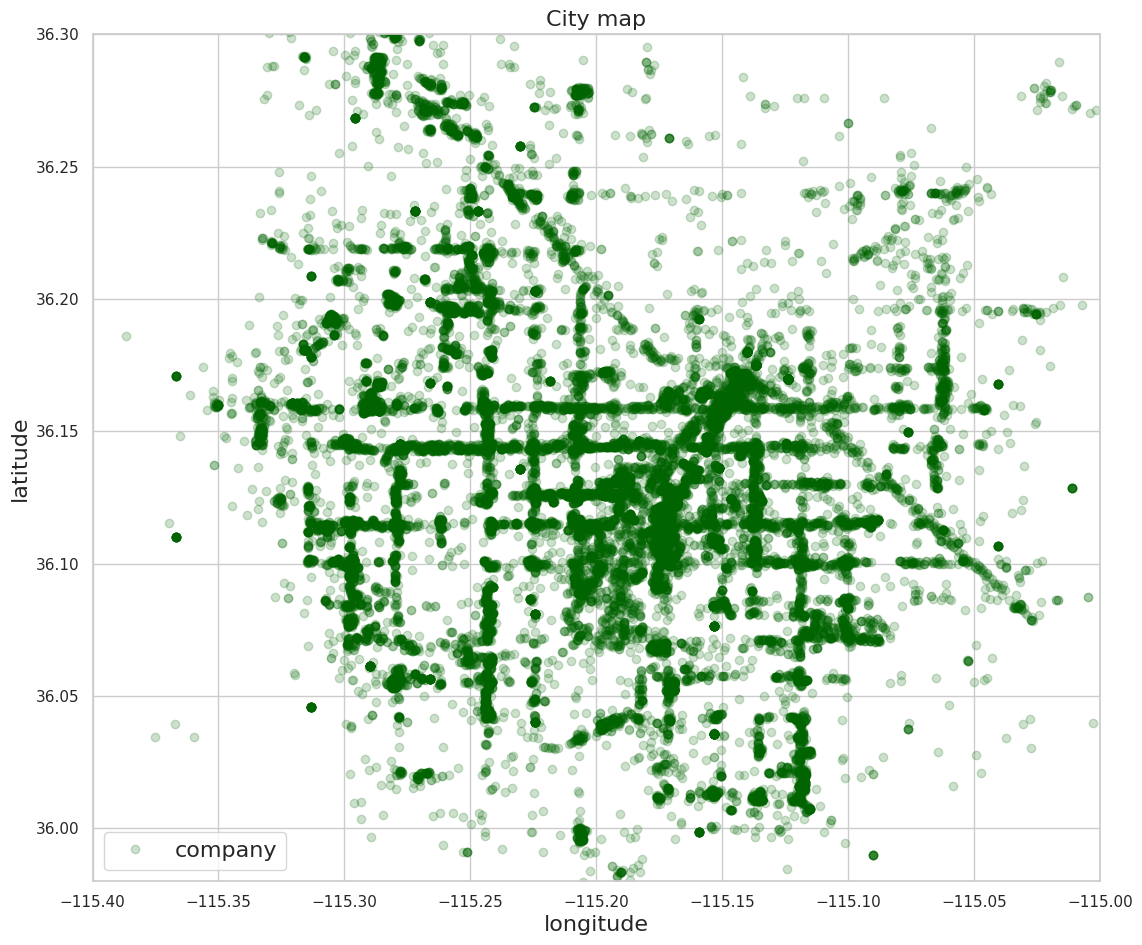

In [8]:
sns.set(style='whitegrid')
data_lv = yelp_business[yelp_business['city']=='Las Vegas']
plt.figure(figsize=(13, 11))
plt.plot(data_lv['longitude'], data_lv['latitude'], 'ro', label='company', alpha=0.2, color='darkgreen')
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('City map', fontsize=16)
plt.xlim(-115.4, -115)
plt.ylim(35.98, 36.3)
plt.legend(fontsize=16, frameon=True)
plt.show()

Что вы можете сказать об этом графике? Что мы изобразили? Напоминает ли он вам что-то? :)

Кажется, вот что:

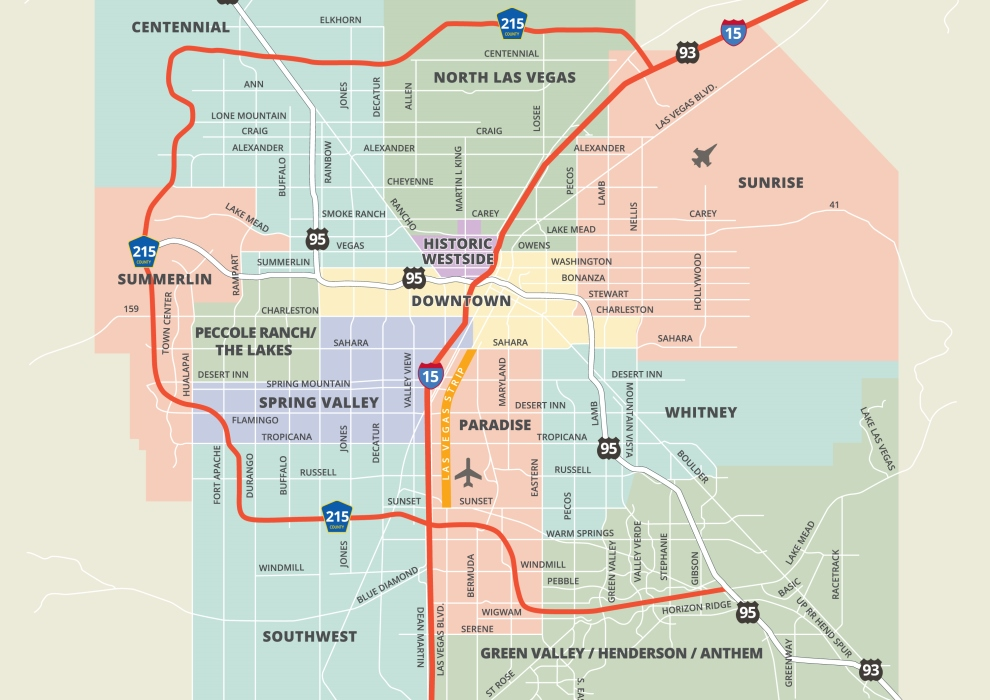

## Часть 2. Оценки компаний



Загрузим теперь таблицу оценок `yelp_review.csv`.

Ссылка на данные:
https://drive.google.com/file/d/1-FDnL2PbEsw4anE4blnR7Ioe3VZYvKrG/view?usp=sharing

In [16]:
yelp_review = pd.read_csv('yelp_review.csv', index_col=0)

In [17]:
yelp_review.shape

(5261668, 2)

Масштаб датасета, конечно, невероятно большой, особенно по меркам датасетов, которые мы рассматривали с вами прежде.

Давайте теперь в подгруженной таблице оценок оставим только компании интересующего нас города.

Для этого воспользуемся циклом и библиотекой `tqdm`, которая позволяет отслеживать прогресс выполнения объёмного блока кода (понимая, с каким количеством данных мы имеем дело, можно сразу же сделать не лишенное смысла предположение, что за пару секунд код, увы, отработать не сможет).

По окончании выполнения кода ячейка вернет нам массив того же размера, что и количество строк в `yelp_review`, а на $i$-м месте будет `True`, если `'business_id'` для этого отзыва встречается в `'business_id'` для компаний, расположенных в Лас-Вегасе, или же `False` в противном случае.

*Примечание.* Поскольку такая операция выполняется довольно долго, после завершения прогона цикла можно сохранить результат её выполнения в файл, чтобы в дальнейшем не запускать всё заново. Этот лайфхак является очень хорошим примером классического подхода к улучшению воспроизводимости результатов в рамках анализа данных.

Запустите эту ячейку, чтобы примерно оценить время выполнения кода!...

In [ ]:
%%time

from tqdm import tqdm

mask = np.zeros((yelp_review.shape[0],))

for iter in tqdm(range(yelp_review.shape[0])):
  mask[iter] = yelp_review.iloc[iter]['business_id'] in data_lv['business_id'].values

np.savetxt('mask.txt', mask.astype(int))

С помощью следующего кода можно подгрузить и обработать готовую маску из файла:

In [ ]:
mask_data = np.loadtxt("mask.txt", dtype=str)

In [ ]:
mask = np.array(list(map(lambda x: x[0], mask_data))).astype(bool)
mask.shape

Однако мы поступим иначе и продемонстрируем всю мощь программирования в следующем блоке кода:

In [12]:
%%time

from tqdm import tqdm

mask = np.zeros((yelp_review.shape[0],))

###
set_lv = set(data_lv['business_id'].values)
###

for iter in tqdm(range(yelp_review.shape[0])):
  mask[iter] = yelp_review.iloc[iter]['business_id'] in set_lv

np.savetxt('mask.txt', mask.astype(int))

100%|██████████| 5261668/5261668 [05:01<00:00, 17446.32it/s]


CPU times: user 4min 40s, sys: 2.48 s, total: 4min 43s
Wall time: 5min 13s


Ну что, впечатляет, да? :)

In [18]:
mask = mask.astype(bool)
yelp_review = yelp_review[mask]

In [19]:
yelp_review.shape

(1604227, 2)

Теперь посчитаем среднюю оценку каждой компании, а также количество выставленных компании оценок. Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [20]:
estim = yelp_review.groupby('business_id').aggregate([np.mean, np.size])

Назовем колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатаем несколько строк полученной таблицы.

In [21]:
estim.columns = ['stars_mean', 'stars_size']

In [22]:
estim.head()

,stars_mean,stars_size
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соединим две полученные ранее таблицы по компаниям интересующего нас города в одну.
Для этого сначала установим поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index` (в одной из них это уже должно было быть сделано).
Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.
В соединенной таблице должны получиться поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [23]:
data_lv = data_lv.set_index('business_id')

In [24]:
data_lv_est = data_lv.join(estim, how='inner')

Изобразим все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [25]:
cut_data =  data_lv_est[(data_lv_est['latitude'] > 35.98) & (data_lv_est['latitude'] < 36.3) & (data_lv_est['longitude'] > -115.4) & (data_lv_est['longitude'] < -115)]
locations = cut_data[['latitude', 'longitude']]
weights = cut_data['stars_mean']

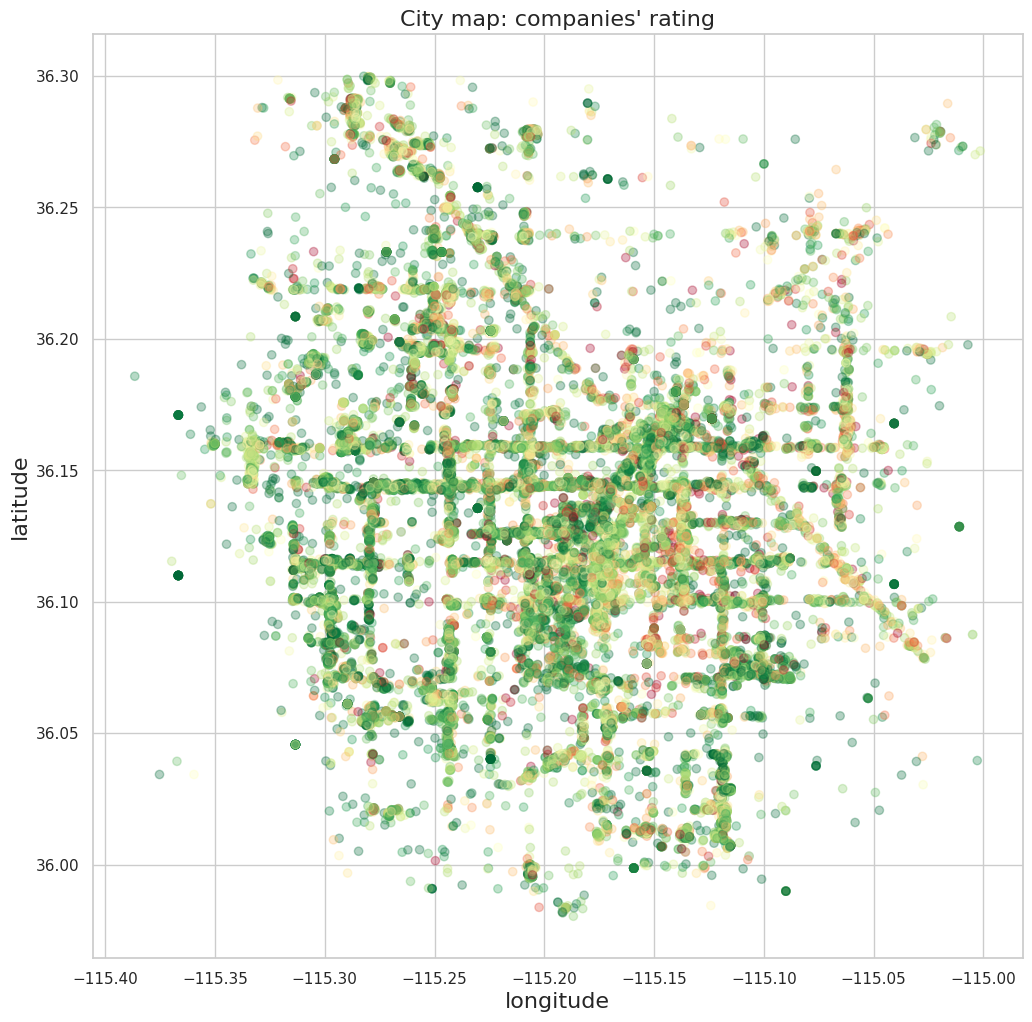

In [26]:
plt.figure(figsize=(12, 12))
x = cut_data['longitude']
y = cut_data['latitude']
plt.scatter(x, y, alpha=0.3, c = pd.to_numeric(cut_data['stars_mean']), cmap = 'RdYlGn')
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('City map: companies\' rating', fontsize=16)
plt.show()

Чтобы получить районы города, округлим значения широты и долготы, подобрав оптимальный размер района. Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [27]:
copy_for_rest = cut_data.copy()
cut_data['latitude'] = np.round(cut_data['latitude']*4, decimals=1)*0.25
cut_data['longitude'] = np.round(cut_data['longitude']*4, decimals=1)*0.25

Для получения средней оценки компании по району построим сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений -- оценки. Аггрегирующей функцией является среднее.

Изобразим полученную таблицу при помощи `sns.heatmap`.

In [28]:
table = pd.pivot_table(cut_data, values='stars_mean', index=['latitude'],
                    columns=['longitude'], aggfunc=np.mean)

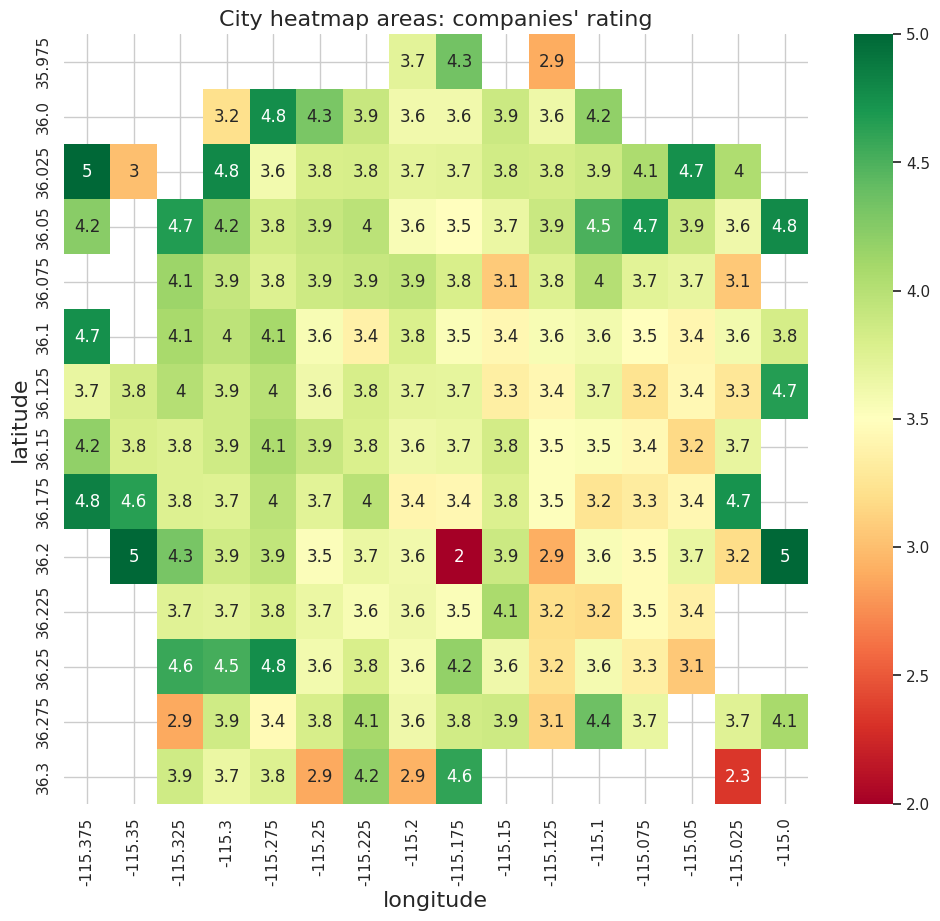

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(table, cmap='RdYlGn', annot=True)
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('City heatmap areas: companies\' rating', fontsize=16)
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

#### Вопрос
Почему эти недостатки могут быть существенными?



#### Пояснение

Если в районе мало компаний, то мы имеем маленькую выборку для того, чтобы обобщить полученную статистику на генеральную совокупность по этому району. Например, если в районе всего два заведения и оба с низким рейтингом, то нельзя делать вывод о качестве услуг в данном районе. Также недостатком полученного графика является то, что цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки. Это плохо, потому что визуализация настроена на выбросы. Если есть одно заведение с очень низким рейтингом, то цвета по остальным заведениям становятся менее различимыми.

Оставим районы, в которых имеется информация о не менее $30$ компаний. Построим новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [30]:
table_count = pd.pivot_table(cut_data, values='stars_mean', index=['latitude'],
                    columns=['longitude'], aggfunc=np.size)

In [31]:
table_stars = pd.pivot_table(cut_data, values='stars_mean', index=['latitude'],
                    columns=['longitude'], aggfunc=np.mean)

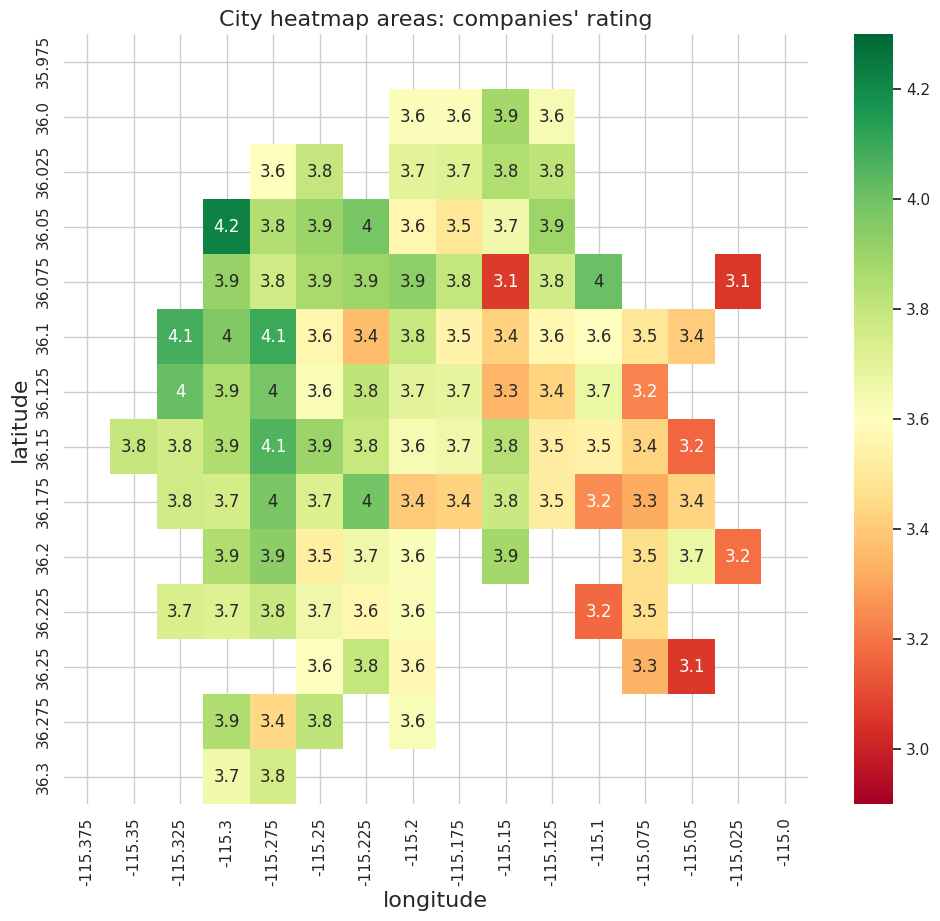

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(table_stars, mask =table_count<30, vmin=2.9, vmax=4.3, cmap='RdYlGn', annot=True)
#sns.heatmap(table_stars, vmin=1, vmax=5, cmap='RdYlGn')
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('City heatmap areas: companies\' rating', fontsize=16)
plt.show()

#### Вопрос

Сравним полученный график с предыдущим: какой вывод можно сделать?



#### Пояснение

Вывод: в сравнении с предыдущим графиком этот график визуализирует более интуитивную информацию о качестве оцениваемых по 5-балльной шкале услуг в заведениях. Видно, что оценки большинства заведений находятся в диапазоне от 3 до 4.5. Отсеивание районов с маленьким количеством компаний привело к тому, что по графику нельзя сделать неправильный вывод о качестве услуг в этих районах.

Убедиться в этом также помогает график ниже:

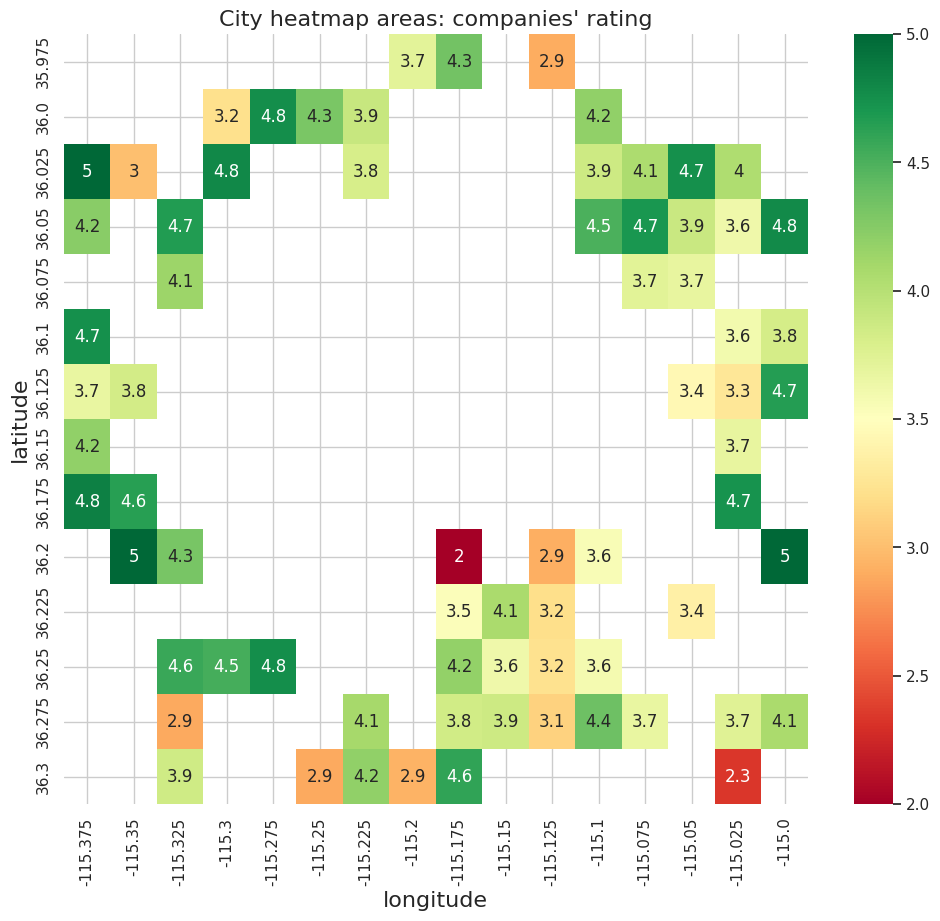

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(table_stars, mask =table_count>=30, vmin=2, vmax=5, cmap='RdYlGn', annot=True)
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('City heatmap areas: companies\' rating', fontsize=16)
plt.show()

Выше показаны отсеянные районы. Видно, что это преимущественно окраина города. Также немало оценок со "слишком высоким" рейтингом и "слишком низким".

## Часть 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `Restaurant`. Составим таблицу, в которой будет информация о всех ресторанах интересующего нас города, для которых имеется не менее $5$ отзывов. Далее построим график районов, в котором каждому району сопоставим среднюю оценку по ресторанам этого района. Рассматриваем только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [35]:
rest_data = cut_data[cut_data['categories'].str.contains('Restaurant')]

In [36]:
rest_data = rest_data[rest_data['stars_size']>4]

In [37]:
rest_table_count = pd.pivot_table(rest_data, values='stars_mean', index=['latitude'],
                    columns=['longitude'], aggfunc=np.size)
rest_table_stars = pd.pivot_table(rest_data, values='stars_mean', index=['latitude'],
                    columns=['longitude'], aggfunc=np.mean)

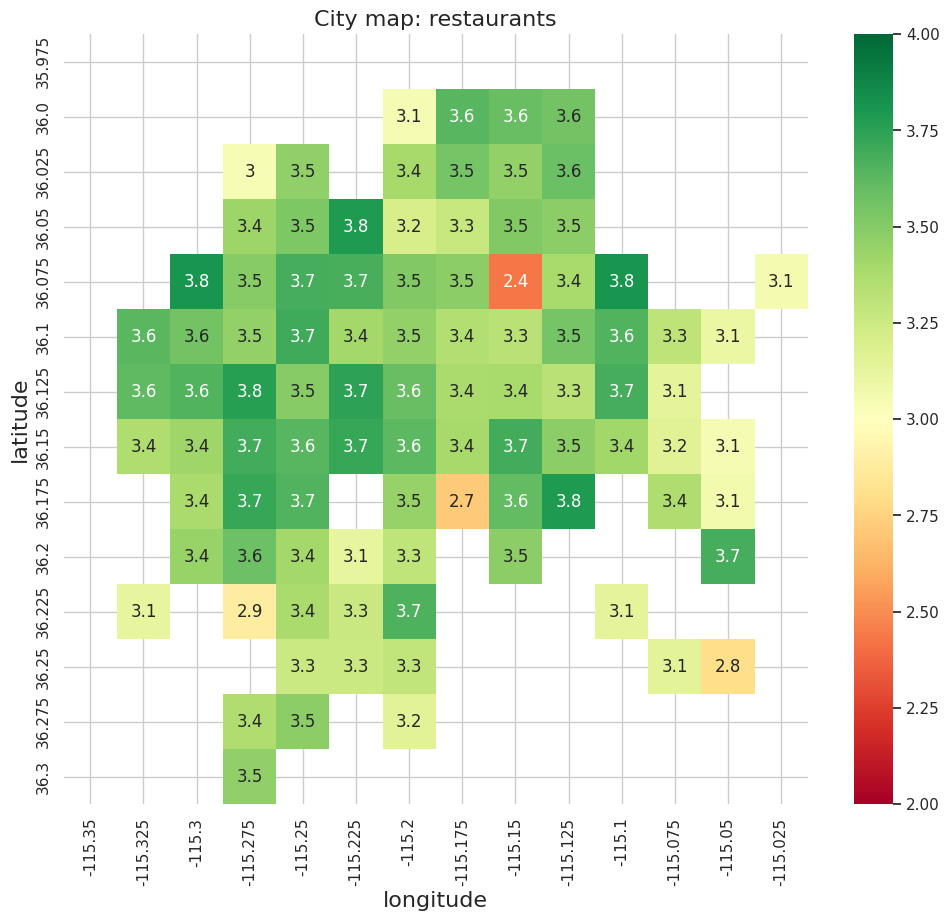

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(rest_table_stars, mask =rest_table_count<10, vmin=2, vmax=4.0, cmap='RdYlGn', annot=True)
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('City map: restaurants', fontsize=16)
plt.show()

#### Вопрос

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?



#### Пояснение

Маленькие выборки это плохо, потому что есть следующий риск: маленькая выборка может не обладать теми же свойствами, что генеральная совокупность. Для того, чтобы делать релевантные выводы, нужна репрезентативная выборка, которую сложно получить при проведении малого количества экспериментов (реализации маленькой выборки).

Напечатаем в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану выведем следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [43]:
rest_data = copy_for_rest[copy_for_rest['categories'].str.contains('Restaurant')]

In [44]:
rest_data = rest_data[rest_data['stars_size']>49].sort_values('stars_mean', ascending=False)

In [45]:
top10 = rest_data[['name', 'stars_mean', 'stars_size', 'latitude', 'longitude', 'categories']].head(10)

In [46]:
top10

,name,stars_mean,stars_size,latitude,longitude,categories
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",4.966480,179,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...
Fmij544FE1iOruoxI41kew,"""Pepito Shack""",4.907692,65,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",4.890909,55,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",4.868132,91,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...
IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",4.848069,1165,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",4.836538,104,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",4.833333,180,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes
l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",4.816754,191,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...
hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...


Нанесем на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметим 10 ресторанов, которые мы получили ранее.

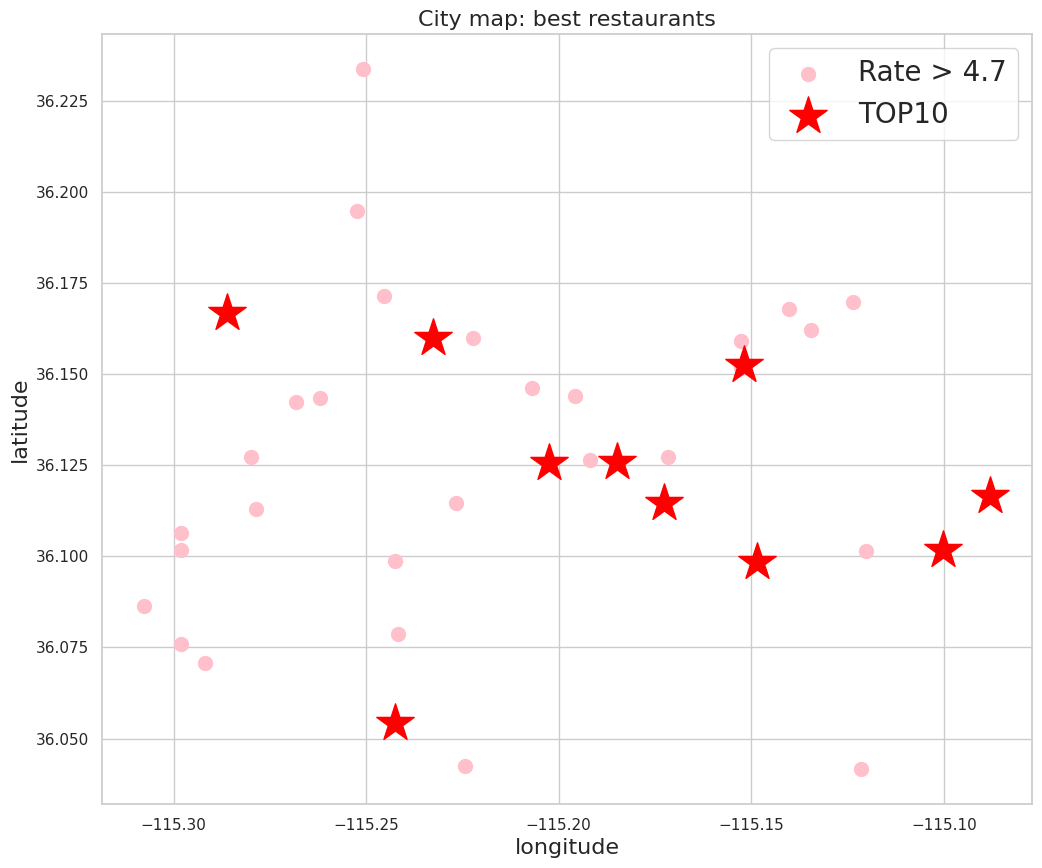

In [47]:
best_rest_table = rest_data[rest_data['stars_mean']>=4.7]
plt.figure(figsize=(12,10))
plt.scatter(best_rest_table['longitude'], best_rest_table['latitude'], s=100, label='Rate > 4.7', color='pink')
plt.scatter(top10['longitude'], top10['latitude'], s=800, marker='*', label = 'TOP10', color='red')
plt.xlabel('longitude', fontsize=16)
plt.ylabel('latitude', fontsize=16)
plt.title('City map: best restaurants', fontsize=16)
plt.legend(fontsize=20, frameon=True)
plt.show()

## Часть 4. Творческая часть

Придумайте какую-нибудь свою интересную и масштабную задачу, которую можно было бы решить в рамках имеющихся у нас данных. В идеале — сразу обосновать, какую пользу решение такой задачи могло бы нести для бизнеса.

Давайте вместе реализуем самые интересные и нетривиальные из ваших предложений!

    # your ideas here